In [2]:
# reading first five rows
import pandas as pd
df = pd.read_csv("titanic3.csv")
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#filtering rows where gender is female and the survived
df[(df['sex'] == "female")&(df['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1.0,1.0,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1.0,0.0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1.0,1.0,"Aubart, Mme. Leontine Pauline",female,24.0,0.0,0.0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,3.0,1.0,"Turja, Miss. Anna Sofia",female,18.0,0.0,0.0,4138,9.8417,NaN,S,15,NaN,NaN
1261,3.0,1.0,"Turkula, Mrs. (Hedwig)",female,63.0,0.0,0.0,4134,9.5875,NaN,S,15,NaN,NaN
1286,3.0,1.0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0.0,0.0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3.0,1.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,NaN,NaN,NaN


In [4]:
# How many voyagers have paid greater than the average fare value ?
len(df[df['fare']>df['fare'].mean()])

304

In [5]:
#How many voyagers paying greater than mean fare are female ? 
len(df[(df['fare']>df['fare'].mean())&(df['sex']=='female')])

154

In [6]:
#How many males above age 25 did not survive ?
len(df[(df['sex']=='male')&(df['age']>25)&(df['survived']==0)])

319

In [7]:
# What % of women below 20 years of age did not survive ? 
(len(df[(df['sex']=='female')&(df['age']<20)&(df['survived']==0)]) / len(df[(df['sex']=='female')&(df['age']<20)]))*100

30.097087378640776

In [8]:
#here we replace values "female" with f and "male" with m
df['sex'].replace({"female" : "F" , "male" : "M"})

0         F
1         M
2         F
3         M
4         F
       ... 
1305      F
1306      M
1307      M
1308      M
1309    NaN
Name: sex, Length: 1310, dtype: object

In [11]:
# what is the average age by Gender ? 
df.groupby("sex").agg({"age" : "mean"})

,age
sex,
female,28.687071
male,30.585233


In [13]:
#gender wise survived,age fare analysis
df.groupby(["sex" , "survived"]).agg({"age" : ["mean","max"] , "fare" : "mean"}).round(0).astype(int)

age     fare
                mean max mean
sex    survived              
female 0.0        25  63   22
       1.0        30  76   55
male   0.0        32  74   24
       1.0        27  80   37

In [15]:
#cheking duplicate percentage
len(df.drop_duplicates()) / len(df)

1.0

In [16]:
#grouping by time
# Load libraries
import pandas as pd
import numpy as np

# Create date range
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

# Create DataFrame
dataframe = pd.DataFrame(index=time_index)

# Create column of random values
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

dataframe.resample('2D').sum() 

,Sale_Amount
2017-06-06,29028
2017-06-08,28754
2017-06-10,29233
2017-06-12,28682
2017-06-14,28946
2017-06-16,28774
2017-06-18,28797
2017-06-20,28840
2017-06-22,28698
2017-06-24,28687


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

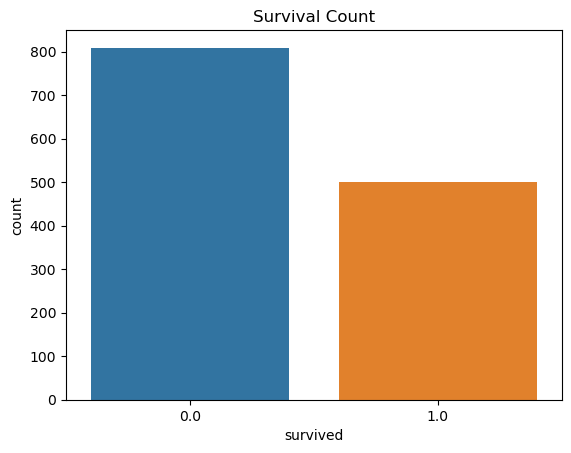

In [20]:
# Visualize survival count
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

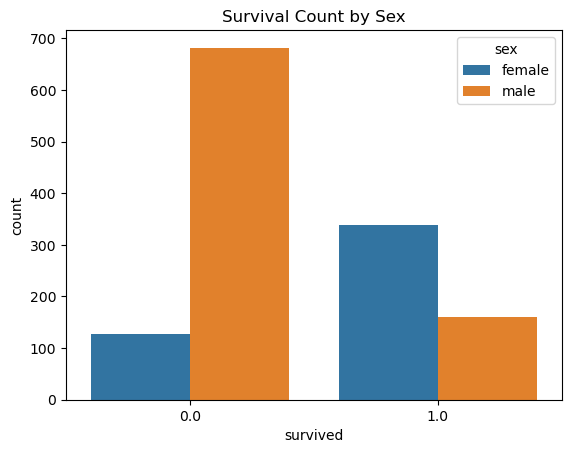

In [21]:
# Visualize survival count by sex
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

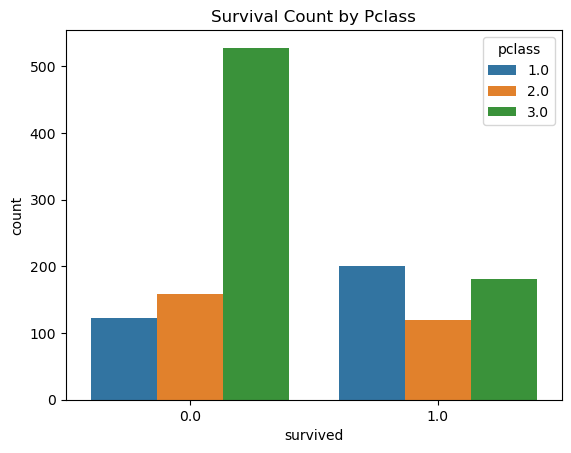

In [22]:
# Visualize survival count by Pclass
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Survival Count by Pclass')
plt.show()

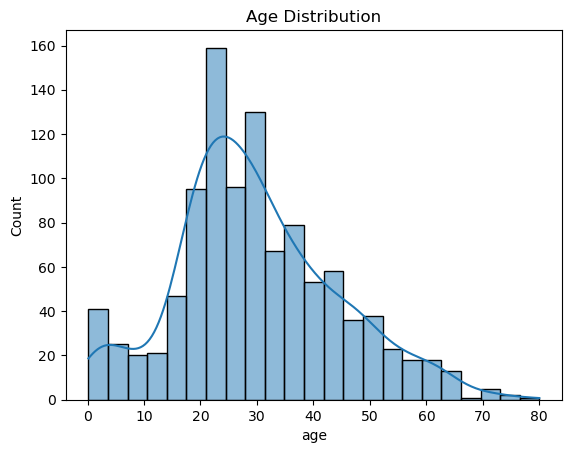

In [24]:
# Visualize distribution of Age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

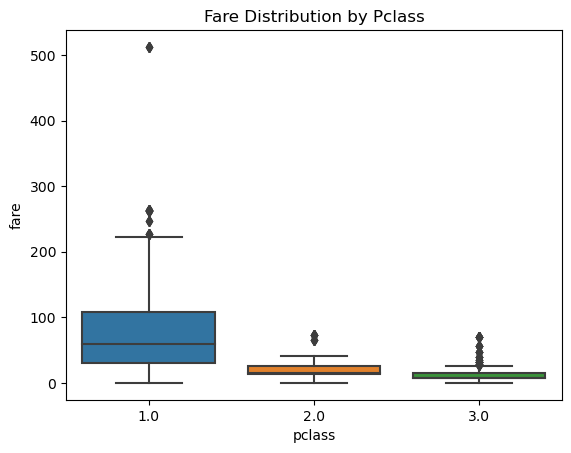

In [26]:
# Visualize fare distribution by Pclass
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()

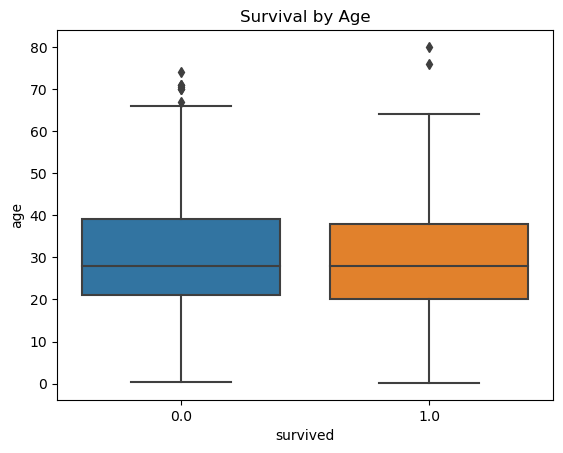

In [28]:
# Visualize survival by Age
sns.boxplot(x='survived', y='age', data=df)
plt.title('Survival by Age')
plt.show()

C:\Users\Saikat Das\AppData\Local\Temp\ipykernel_10096\2569056058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


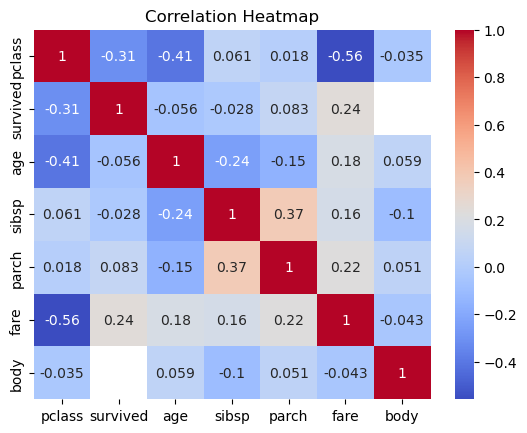

In [29]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()